<a href="https://colab.research.google.com/github/KseniyaKanushina/homework_DS_2022/blob/main/%D0%94%D0%BE%D0%BC_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [3]:
def split_df(df, test_size=.3, size=1, seed=42):
    df_res = df.sample(int(df.shape[0]*size)).copy() if size != 1 else df.copy()
    X_res, y_res = df_res.iloc[:,:-1], df_res.iloc[:,-1]
    X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size=test_size, random_state=seed)
    return df_res, X_res, y_res, X_res_train, X_res_test, y_res_train, y_res_test

In [4]:
df, X, y, X_train, X_test, y_train, y_test = split_df(data)
print(df.shape, X.shape, X_train.shape, X_test.shape)

(1599, 12) (1599, 11) (1119, 11) (480, 11)


2.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [5]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [6]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]
clfs = [RandomForestClassifier(n_estimators=100), BaggingClassifier(n_estimators=100), DecisionTreeClassifier()]

for clf in clfs:
    print(clf)
    %time cvs = cross_val_score(clf, X, y, scoring='accuracy', cv=3).mean()
    print(cvs, '\n')

RandomForestClassifier()
CPU times: user 1.58 s, sys: 25.6 ms, total: 1.61 s
Wall time: 2.07 s
0.5616010006253909 

BaggingClassifier(n_estimators=100)
CPU times: user 2.22 s, sys: 12.5 ms, total: 2.23 s
Wall time: 2.24 s
0.5565978736710444 

DecisionTreeClassifier()
CPU times: user 41.6 ms, sys: 2 µs, total: 41.6 ms
Wall time: 41.2 ms
0.4540337711069418 



Лучший результат по метрике accuracy у RandomForestClassifier, у BaggingClassifier чуть ниже, но скорость обучения дольше.

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:

10, 50, 100, 200, далее с шагом 200 до 5000 деревьев. Постройте график зависимости качества от числа деревьев.

In [7]:
from matplotlib import pyplot as plt

In [8]:
%%time
N = [10, 50, 100] + [n for n in range(200,5001,200)]
scores = []

for n in N:
    clf = RandomForestClassifier(n_estimators=int(n), n_jobs=-1)
    clf.fit(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    score_train = clf.score(X_train, y_train)
    scores.append({'n':int(n), 'score_test':score_test, 'score_train':score_train})

CPU times: user 6min, sys: 30.9 s, total: 6min 31s
Wall time: 4min 36s


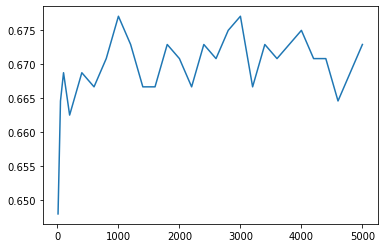

In [9]:
scores_df = pd.DataFrame(scores)

plt.plot(scores_df.n, scores_df.score_test)
#plt.plot(scores_df.n, scores_df.score_train)

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]
clfs = [{'name':'GradientBoostingClassifier', 'model':GradientBoostingClassifier()}, 
        {'name':'XGBClassifier', 'model':XGBClassifier(objective='multi:softprob', eval_metric='mlogloss')}]

for clf in clfs:
    clf_name = clf['name']
    model = clf['model']
    print(clf_name)
    %time cvs = cross_val_score(model, X, y, scoring="accuracy", cv=5).mean()
    print(cvs, '\n')

GradientBoostingClassifier
CPU times: user 11.2 s, sys: 50.7 ms, total: 11.2 s
Wall time: 11.3 s
0.5622257053291536 

XGBClassifier
CPU times: user 2.22 s, sys: 11.5 ms, total: 2.24 s
Wall time: 2.33 s
0.5690987460815047 



5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3). Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
GradientBoostingClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [15]:
XGBClassifier().get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])

In [16]:
models = [
    {
        'clf': GradientBoostingClassifier,
        'params': [{
            'learning_rate': [.1, .5, .9],
            'n_estimators': [10, 20, 30], 
            'max_depth': [2, 3, 4]
        }]
    }, {
        'clf': XGBClassifier,
        'params': [{
            'objective': ['multi:softprob'],
            'eval_metric': ['mlogloss', 'mae'],
            'learning_rate': [.1, .5, .9],
            'n_estimators': [10, 20, 30],  
            'max_depth': [2, 3, 4]
        }]
    }
]

cv_dfs = []

for model in models:
    clf_name = model['clf'].__name__
    clf = model['clf']
    params = model['params']
    %time search = GridSearchCV(clf(), param_grid=params, scoring='accuracy', cv=3, n_jobs=-1).fit(X, y)
    cv_df = pd.DataFrame(search.cv_results_)
    cv_df['clf_name'] = clf_name
    cv_dfs.append(cv_df)
    print(clf_name)
    print(search.best_params_)

CPU times: user 1.44 s, sys: 124 ms, total: 1.56 s
Wall time: 26.4 s
GradientBoostingClassifier
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 30}
CPU times: user 705 ms, sys: 32.8 ms, total: 738 ms
Wall time: 11 s
XGBClassifier
{'eval_metric': 'mlogloss', 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 20, 'objective': 'multi:softprob'}


In [17]:
cvs_df = pd.concat(cv_dfs).reset_index(drop=True)
best_models = cvs_df[
        (cvs_df.mean_fit_time == cvs_df.mean_fit_time.min()) |
        #(cvs_df.mean_score_time == cvs_df.mean_score_time.min()) | 
        (cvs_df.mean_test_score == cvs_df.mean_test_score.max())]
best_models = best_models[[
        'clf_name',
        'mean_test_score',
        'mean_fit_time',
        'mean_score_time',
        'param_learning_rate',
        'param_max_depth',
        'param_n_estimators',
        'param_eval_metric'
]]
best_models

,clf_name,mean_test_score,mean_fit_time,mean_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_eval_metric
34,XGBClassifier,0.585991,0.168961,0.005377,0.1,4,20,mlogloss
61,XGBClassifier,0.585991,0.166320,0.005362,0.1,4,20,mae
63,XGBClassifier,0.557849,0.049527,0.003094,0.5,2,10,mae


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [ ]:
!pip install catboost

In [19]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [20]:
model = GradientBoostingClassifier
print(model.__name__, '\n')
      
%time cvs = cross_val_score(model(), X, y, scoring="accuracy", cv=3).mean()
print('cross_val_score - ', cvs, '\n')

GradientBoostingClassifier 

CPU times: user 8.83 s, sys: 50.4 ms, total: 8.88 s
Wall time: 13.5 s
cross_val_score -  0.5378361475922451 



In [21]:
model = XGBClassifier
print(model.__name__, '\n')
      
%time cvs = cross_val_score(model(objective='multi:softprob', eval_metric='mlogloss'), X, y, scoring="accuracy", cv=3).mean()
print('cross_val_score - ', cvs, '\n')

XGBClassifier 

CPU times: user 1.16 s, sys: 4.76 ms, total: 1.17 s
Wall time: 1.17 s
cross_val_score -  0.5484677923702314 



In [22]:
model = LGBMClassifier
print(model.__name__, '\n')
      
%time cvs = cross_val_score(model(), X, y, scoring="accuracy", cv=3).mean()
print('cross_val_score - ', cvs, '\n')

LGBMClassifier 

CPU times: user 2 s, sys: 103 ms, total: 2.11 s
Wall time: 2.23 s
cross_val_score -  0.5397123202001252 



In [23]:
model = CatBoostClassifier
print(model.__name__, '\n')
      
%time cvs = cross_val_score(model(verbose=False), X, y, scoring="accuracy", cv=3).mean()
print('cross_val_score - ', cvs, '\n')

CatBoostClassifier 

CPU times: user 37.1 s, sys: 4.54 s, total: 41.6 s
Wall time: 32 s
cross_val_score -  0.5328330206378987 



7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов. Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [24]:
LGBMClassifier().get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq'])

In [25]:
CatBoostClassifier(verbose=False).fit(X,y).get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'MultiClass',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'use_best_model': False,
 'class_names': [3, 4, 5, 6, 7, 8],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'MultiClass',
 'learning_rate'

In [26]:
models = [
    {
        'clf': LGBMClassifier,
        'params': [{
            'objective': ['multi:softprob'],
            'eval_metric': ['mlogloss', 'mae'],
            'learning_rate': [.1, .5, .9],
            'n_estimators': [10, 20, 30],  
            'max_depth': [2, 3, 4]}]
    }, {
        'clf': CatBoostClassifier,
        'params': [{
            'loss_function': ['MultiClass'],
            'eval_metric': ['MultiClass'],
            'learning_rate': [.1, .5, .9],
            'n_estimators': [10, 20, 30],  
            'max_depth': [2, 3, 4],
            'verbose': [False]}]
    }
]

cv_dfs = []

for model in models:
    clf_name = model['clf'].__name__
    clf = model['clf']
    params = model['params']
    %time search = GridSearchCV(clf(), param_grid=params, scoring='accuracy', cv=3, n_jobs=-1).fit(X, y)
    cv_df = pd.DataFrame(search.cv_results_)
    cv_df['clf_name'] = clf_name
    cv_dfs.append(cv_df)
    print(clf_name)
    print(search.best_params_, '\n')

CPU times: user 477 ms, sys: 23.3 ms, total: 500 ms
Wall time: 5.59 s
LGBMClassifier
{'eval_metric': 'mlogloss', 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 20, 'objective': 'multi:softprob'} 

CPU times: user 630 ms, sys: 32.3 ms, total: 662 ms
Wall time: 5.97 s
CatBoostClassifier
{'eval_metric': 'MultiClass', 'learning_rate': 0.1, 'loss_function': 'MultiClass', 'max_depth': 4, 'n_estimators': 30, 'verbose': False} 



In [27]:
cvs_df = pd.concat(cv_dfs).reset_index(drop=True)
best_models = cvs_df[
        (cvs_df.mean_fit_time == cvs_df.mean_fit_time.min()) |
        #(cvs_df.mean_score_time == cvs_df.mean_score_time.min()) | 
        (cvs_df.mean_test_score == cvs_df.mean_test_score.max())]
best_models = best_models[[
        'clf_name',
        'mean_test_score',
        'mean_fit_time',
        'mean_score_time',
        'param_learning_rate',
        'param_max_depth',
        'param_n_estimators',
        'param_eval_metric'
]]
best_models

,clf_name,mean_test_score,mean_fit_time,mean_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_eval_metric
36,LGBMClassifier,0.567230,0.024770,0.004561,0.5,2,10,mae
62,CatBoostClassifier,0.587867,0.190102,0.003908,0.1,4,30,MultiClass


8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью optuna . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [ ]:
!pip install optuna

In [29]:
import optuna
from functools import partial
from sklearn.pipeline import Pipeline

In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [31]:
def opt(objective):
    study = optuna.create_study(direction="maximize")
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params


def XGB_objective(trial):
    _n_estimators = trial.suggest_int('n_estimators', 25, 200)
    _max_depth = trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17])
    _learning_rate = trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02])

    xgbc = XGBClassifier(
        max_depth=_max_depth,
        n_estimators=_n_estimators,
        learning_rate=_learning_rate,
        n_jobs=-1,
        random_state=42
    )

    scores = cross_val_score(xgbc, X, y, cv=3, scoring='accuracy')
    return scores.mean()


In [32]:
best_params = opt(XGB_objective)

[I 2022-11-06 06:55:51,046] A new study created in memory with name: no-name-ba73c764-b460-4dde-bbd9-b7c75408c257


Best score: 0.58411507191995

Optimized parameters: {'n_estimators': 71, 'max_depth': 5, 'learning_rate': 0.018}



9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [33]:
from sklearn.ensemble import StackingClassifier

In [34]:
estimators = [
    ('cbc', CatBoostClassifier()),
    ('lgbmc', LGBMClassifier()),
    ('rfc', GradientBoostingClassifier()),
    ('xgbc', XGBClassifier())
]
stacked = StackingClassifier(estimators=estimators)
%time score = cross_val_score(estimator=stacked, X=X, y=y, scoring='accuracy', cv=3, n_jobs=-1).mean()
score

CPU times: user 1.32 s, sys: 189 ms, total: 1.51 s
Wall time: 3min 12s


0.575984990619137

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [40]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from functools import partial
from sklearn.pipeline import Pipeline

In [41]:
models = [
    {'name':'gbc', 'clf':GradientBoostingClassifier(), 
     'metrics':{'param_name':'criterion','param_vals':['friedman_mse', 'mae']}},
    {'name':'xgbc', 'clf':XGBClassifier(),
     'metrics':{'param_name':'eval_metric','param_vals':['mlogloss', 'mae']}},
    {'name':'lgbmc', 'clf':LGBMClassifier(objective='multi:softprob'),
     'metrics':{'param_name':'eval_metric','param_vals':['mlogloss', 'mae']}},
    {'name':'cbc', 'clf':CatBoostClassifier(loss_function='MultiClass'),
     'metrics':{'param_name':'eval_metric','param_vals':['MultiClass']}},
]

def objective(params, pipe,  X_train, y_train):
    pipe.set_params(**params)
    score = cross_val_score(estimator=pipe, X=X_train, y=y_train, scoring='accuracy', cv=3, n_jobs=-1)
    return {'loss': -score.mean(), 'params': params, 'status': STATUS_OK}

best_trials = {}

for model in models:
    name = model['name']
    clf = model['clf']
    param_name = model['metrics']['param_name']
    param_vals = model['metrics']['param_vals']
    pipe = Pipeline([(name, clf)])
    search_space = {
        name+'__'+param_name: hp.choice(label=param_name, options=param_vals),
        name+'__learning_rate' : hp.loguniform(label='learning_rate', low=np.log(0.04), high=np.log(0.5)),
        name+'__max_depth' :  hp.choice(label="max_depth", options=np.arange(2, 10, 1, dtype=int)),
        name+'__n_estimators' : hp.choice(label="n_estimators", options=np.arange(1, 100, 10, dtype=int))
    }
    trials = Trials()
    best = fmin( 
        fn=partial(objective, pipe=pipe, X_train=X, y_train=y),
        space=search_space,
        algo=tpe.suggest,
        max_evals=40,
        trials=trials,
        show_progressbar=True
    )
    best_trials[name] = trials.best_trial
    print('name -', name)
    print('loss -', trials.best_trial['result']['loss'])
    for param_name in trials.best_trial['result']['params']:
        print(param_name.split('__')[1], '-', trials.best_trial['result']['params'][param_name])
    print('\n')

100%|██████████| 40/40 [10:05<00:00, 15.15s/it, best loss: -0.5728580362726704]
name - gbc
loss - -0.5728580362726704
criterion - friedman_mse
learning_rate - 0.05279188333662047
max_depth - 2
n_estimators - 71


100%|██████████| 40/40 [00:30<00:00,  1.32it/s, best loss: -0.5841150719199499]
name - xgbc
loss - -0.5841150719199499
eval_metric - mlogloss
learning_rate - 0.05011130589268611
max_depth - 4
n_estimators - 41


100%|██████████| 40/40 [00:14<00:00,  2.77it/s, best loss: -0.5784865540963102]
name - lgbmc
loss - -0.5784865540963102
eval_metric - mlogloss
learning_rate - 0.06606785423186147
max_depth - 2
n_estimators - 51


100%|██████████| 40/40 [01:15<00:00,  1.88s/it, best loss: -0.5928705440900562]
name - cbc
loss - -0.5928705440900562
eval_metric - MultiClass
learning_rate - 0.04062780729885765
max_depth - 4
n_estimators - 81




In [42]:
clfs = {'gbc':GradientBoostingClassifier, 'xgbc':XGBClassifier, 'lgbmc':LGBMClassifier, 'cbc':CatBoostClassifier}
optimal_models = []
for name in best_trials:
    params = best_trials[name]['result']['params']
    renamed_params = {}
    for param_name in params:
        renamed_name = param_name.split('__')[1]
        renamed_params[renamed_name] = params[param_name]
    model = clfs[name]
    optimal_model = model(**renamed_params)
    optimal_models.append((name, optimal_model))

stacked = StackingClassifier(estimators=optimal_models)
%time score = cross_val_score(estimator=stacked, X=X, y=y, scoring='accuracy', cv=3, n_jobs=-1).mean()
score

CPU times: user 171 ms, sys: 15.3 ms, total: 186 ms
Wall time: 22.4 s


0.5872420262664165

Стэкинг моделей с оптимальными параметрами, показывает более лучший результат по метрике и по времени обучения. Вывод- данный ансамблевый лучше применять на предподготовленных моделях с заранее подобранными оптимальными параметрами.